In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [47]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import timeit
from sklearn import tree

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Partie 1 : Régression – Prédiction de qualité de vin

**Dataset :** le dataset “White Wine Quality” contient des informations physico-chimiques
(densité, pH, Acidité volatile, etc) sur différents échantillons de vin blanc.\
**Objectif :** Prédire la qualité (quality) du vin blanc en fonction de ses caractéristiques
physico-chimiques.
\
1. Préparation des données

In [50]:
data = pd.read_csv('/content/drive/MyDrive/1dataset/winequality.csv', skipinitialspace=True , sep=";")

In [52]:
print(data.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

2. Afficher les 5 premières lignes et examiner les caractéristiques des variables (
describe()).|

In [53]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Les colonnes comme density, pH, et sulphates ont des variations plus faibles et des données concentrées autour de la moyenne. /
Pour la colonne quality, les notes semblent principalement concentrées entre 5 et 6, ce qui pourrait indiquer une distribution asymétrique ou un déséquilibre

3. Vérifier les valeurs manquantes et les traiter si nécessaire.

In [ ]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


4. Diviser les données en ensemble d'entraînement (80%) et de test (20%).

In [55]:
X_caractéristique = data.iloc[:, :-1]
Y_qualité = data.iloc[:, -1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_caractéristique, Y_qualité, test_size=0.2, random_state=0)


In [56]:
print(f"\nTaille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (3918, 11)
Taille de l'ensemble de test : (980, 11)


5. Normaliser les variables numériques.

In [57]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

# 1.2. Modélisation
1. Entraîner une régression linéaire.

In [58]:
# Entraîner le modèle régression linéaire
model1 = LinearRegression()
model1.fit(X_train_n , y_train)
y_pred_linear = model1.predict(X_test_n)

2. Entraîner un arbre de décision avec entropy.

Dans cette étape, on me demande de créer un arbre de décision avec le critère entropy. Cependant, il s'agit d'un problème de régression et non de classification . J'ai teste d'utilisé un modèle DecisionTreeClassifier avec criterion='entropy'.

Dans l'étape suivante, j'ai également testé une approche de régression avec DecisionTreeRegressor en utilisant le critère squared_error. Toutefois, j'ai choisi la régression pour explorer les deux approches, bien que le problème soit initialement de classification

In [93]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_modelTEST = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree_modelTEST.fit(X_train_n, y_train)


y_pred_tree2 = decision_tree_modelTEST.predict(X_test_n)
print(evaluate_model("R", y_test, y_pred_tree2))

{'Modèle': 'R', 'rmse': 0.9197382058754213, 'r2': 0.04023154848046284}


In [60]:
# Correct criterion for regression
model2 = DecisionTreeRegressor(criterion="squared_error",
    max_depth=10,
    min_samples_split=10, # contrôle le nombre minimal d'échantillons qu'un nœud doit avoir pour se diviser en deux branches.
    min_samples_leaf=5,
    random_state=0)
model2.fit(X_train_n, y_train)

y_pred_tree = model2.predict(X_test_n)


3. Entraîner une forêt aléatoire et comparer ses performances avec l'arbre de
décision.

In [61]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=150,          # Augmenter le nombre d'arbres pour plus de stabilité
    max_depth=10,              # Limiter la profondeur pour éviter l'overfitting
    min_samples_split=10,      # Éviter trop de divisions
    min_samples_leaf=5,        # Empêcher les feuilles trop petites
)
model3.fit(X_train_n, y_train)
y_pred_randomtree = model2.predict(X_test_n)


In [62]:
print(evaluate_model("Decision Tree", y_test, y_pred_tree))
print(evaluate_model("linear", y_test, y_pred_linear))
print(evaluate_model("Random Forest", y_test, y_pred_randomtree))


{'Modèle': 'Decision Tree', 'rmse': 0.79764755945304, 'r2': 0.2781281661136169}
{'Modèle': 'linear', 'rmse': 0.8123086554972707, 'r2': 0.2513476761101382}
{'Modèle': 'Random Forest', 'rmse': 0.79764755945304, 'r2': 0.2781281661136169}


In [63]:
def evaluate_model(model_name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {
        "Modèle": model_name,
        "rmse": rmse,
        "r2":r2
    }

In [64]:
import matplotlib.pyplot as plt

# 1. Comparer les résultats obtenus
# Stocker les performances dans un DataFrame pour simplifier l'analyse
results = {
    "Modèle": ["Régression Linéaire", "Arbre de Décision", "Forêt Aléatoire"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree)),
        np.sqrt(mean_squared_error(y_test, y_pred_randomtree)),
    ],
    "R²": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_randomtree),
    ],
}

results_df = pd.DataFrame(results)
print("\nRésumé des performances :")
print(results_df)



Résumé des performances :
                Modèle      RMSE        R²
0  Régression Linéaire  0.812309  0.251348
1    Arbre de Décision  0.797648  0.278128
2      Forêt Aléatoire  0.797648  0.278128


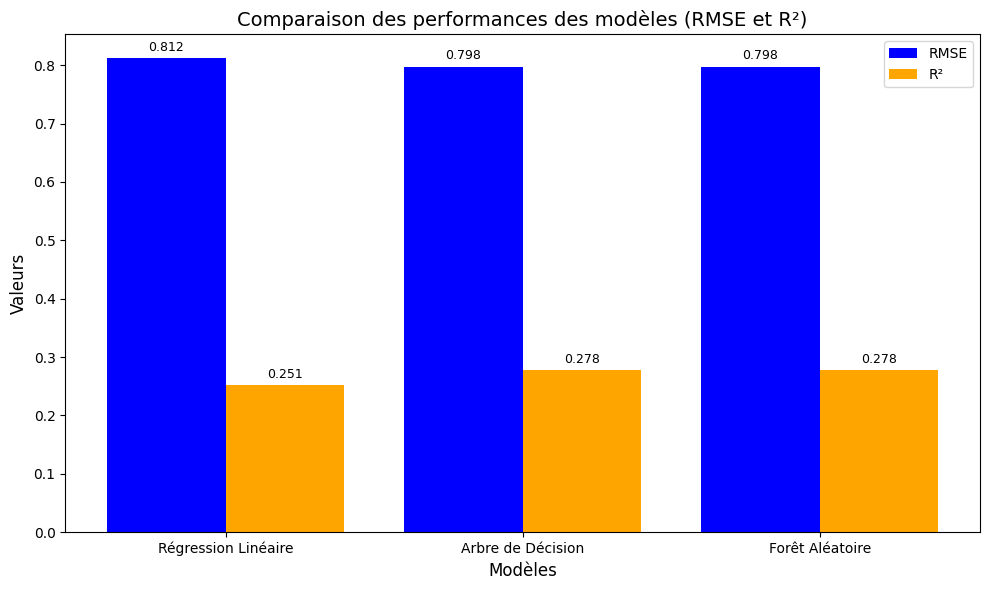

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Préparer les données pour le bar plot
models = results_df["Modèle"]
rmse_values = results_df["RMSE"]
r2_values = results_df["R²"]

x = np.arange(len(models))  # Positions des barres sur l'axe X
width = 0.4  # Largeur des barres

# 2. Créer le bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour RMSE
bars1 = ax.bar(x - width / 2, rmse_values, width, label="RMSE", color="blue")

# Barres pour R²
bars2 = ax.bar(x + width / 2, r2_values, width, label="R²", color="orange")

# 3. Ajouter des étiquettes et une légende
ax.set_xlabel("Modèles", fontsize=12)
ax.set_ylabel("Valeurs", fontsize=12)
ax.set_title("Comparaison des performances des modèles (RMSE et R²)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.3f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Légèrement au-dessus de la barre
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)



# Afficher le graphique
plt.tight_layout()
plt.show()


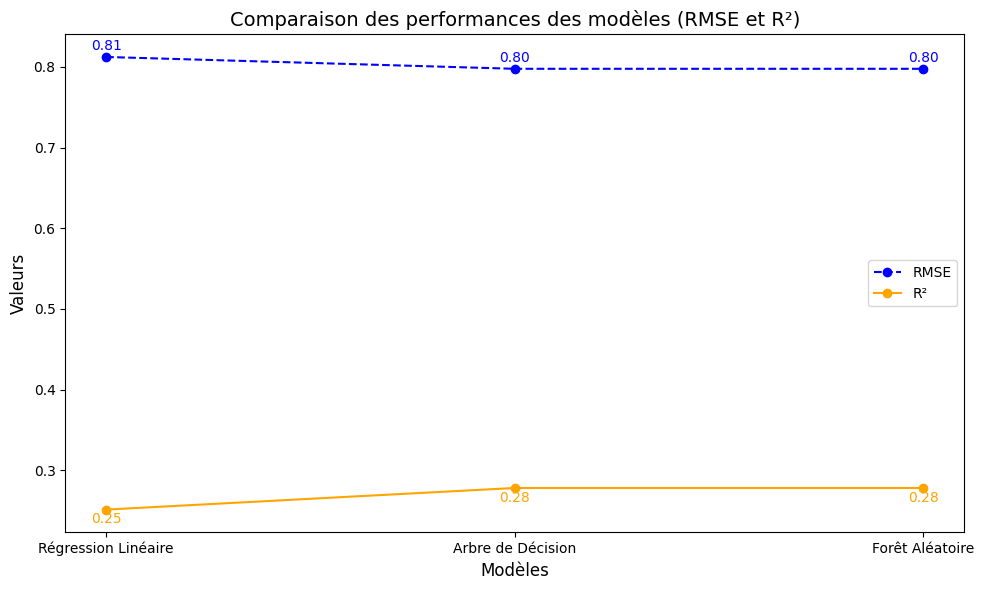

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Préparer les données pour le line plot
models = results_df["Modèle"]
rmse_values = results_df["RMSE"]
r2_values = results_df["R²"]

x = np.arange(len(models))  # Indices des modèles pour l'axe X

# 2. Créer le graphique en ligne
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les lignes pour RMSE et R²
ax.plot(x, rmse_values, marker='o', label="RMSE", color="blue", linestyle='--')
ax.plot(x, r2_values, marker='o', label="R²", color="orange", linestyle='-')

# 3. Ajouter des étiquettes et une légende
ax.set_xlabel("Modèles", fontsize=12)
ax.set_ylabel("Valeurs", fontsize=12)
ax.set_title("Comparaison des performances des modèles (RMSE et R²)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

# Ajouter des annotations pour les valeurs
for i, (rmse, r2) in enumerate(zip(rmse_values, r2_values)):
    ax.annotate(f"{rmse:.2f}", xy=(i, rmse), xytext=(0, 5), textcoords="offset points", ha='center', color="blue")
    ax.annotate(f"{r2:.2f}", xy=(i, r2), xytext=(0, -10), textcoords="offset points", ha='center', color="orange")

# Afficher le graphique
plt.tight_layout()
plt.show()


# 3.  Comparer les résultats obtenus et identifier le modèle le plus performant

**Comparaison des résultats :**

Decision Tree et Random Forest ont exactement le même RMSE (0.7976) et R² (0.2781).

Régression Linéaire a un RMSE légèrement plus élevé (0.8123) et un R² plus faible (0.2513), ce qui signifie qu'elle explique moins bien la variance des données. Cela suggère que les relations entre les variables ne sont pas purement linéaires.



# **Partie 2 : Classification – Prédiction de Heart Disease**

**Dataset :** Le dataset “Heart Disease” est utilisé pour prédire la présence ou l'absence de
maladies cardiaques chez des patients en fonction de plusieurs facteurs de risque médicaux
et personnels.

**Objectif :** Prédire la variable ‘target’ - Présence de maladie cardiaque (0 = Non, 1 = Oui).

**La première étape.** Charger les données “heart_disease.csv” et afficher les 10 premières lignes.

In [67]:
data2 = pd.read_csv('/content/drive/MyDrive/1dataset/heart_disease.csv')

In [68]:
data2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [69]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Préparer les données. Expliquer les étapes.

**Deuxième point** : Il faut vérifier si nous avons des valeurs manquantes ou non. Ensuite, vérifier le type des données : sont-elles numériques ou catégoriques ? En fonction de cela, nous décidons si une normalisation ou un encodage est nécessaire.

In [70]:
print(data2.isnull().sum())
#comment on peux voire on a pas de valeure null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


 Identifier et séparer les colonnes numériques et colonnes catégorielles du DataFrame data2 pour un traitement spécifique, tout en excluant la colonne cible "target".









In [71]:
num_cols = data2.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove("target")
cat_cols = data2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables numériques :", num_cols)
print("Variables catégorielles :", cat_cols)

Variables numériques : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Variables catégorielles : []


Normalisation

In [72]:
# Colonnes à normaliser
cols_a_normaliser = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
#la fonction de normalisation
scaler = StandardScaler()
# Appliquer la normalisation aux colonnes sélectionnées
data2[cols_a_normaliser] = scaler.fit_transform(data2[cols_a_normaliser])

print(data2.head())

        age  sex        cp  trestbps      chol       fbs   restecg   thalach  \
0 -0.268437    1 -0.915755 -0.377636 -0.659332 -0.418878  0.891255  0.821321   
1 -0.158157    1 -0.915755  0.479107 -0.833861  2.387330 -1.004049  0.255968   
2  1.716595    1 -0.915755  0.764688 -1.396233 -0.418878  0.891255 -1.048692   
3  0.724079    1 -0.915755  0.936037 -0.833861 -0.418878  0.891255  0.516900   
4  0.834359    0 -0.915755  0.364875  0.930822  2.387330  0.891255 -1.874977   

      exang   oldpeak     slope        ca      thal  target  
0 -0.712287 -0.060888  0.995433  1.209221  1.089852       0  
1  1.403928  1.727137 -2.243675 -0.731971  1.089852       0  
2  1.403928  1.301417 -2.243675 -0.731971  1.089852       0  
3 -0.712287 -0.912329  0.995433  0.238625  1.089852       0  
4 -0.712287  0.705408 -0.624121  2.179817 -0.522122       0  


3. Maintenant, la troisième étape consiste à **diviser les données** en un ensemble d'entraînement (80%) et un ensemble de test (20%).

In [73]:
X_info = data2.iloc[:, :-1]
Y_target = data2.iloc[:, -1]

In [88]:
Y_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_info, Y_target, test_size=0.2, random_state=0)


# 2.2. Modélisation
1. Entraîner une régression logistique et évaluer sa performance.

In [75]:
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train2, y_train2)
y_pred2_log = log_model.predict(X_test2)
print("Régression logistique:")
print(classification_report(y_test2, y_pred2_log))

Régression logistique:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



2. Entraîner un arbre de décision avec Gini en variant la profondeur de l’arbre.

In [76]:
tree_model = DecisionTreeClassifier(  criterion="gini",
    max_depth=5,
    min_samples_leaf=10,  # Minimum 10 échantillons dans chaque feuille
    random_state=0)
tree_model.fit(X_train2, y_train2)
y_pred2_tree = tree_model.predict(X_test2)
print("Arbre de décision:")
print(classification_report(y_test2, y_pred2_tree))


Arbre de décision:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        98
           1       0.86      0.94      0.90       107

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



3. Entraîner une forêt aléatoire

In [91]:
rf_model = RandomForestClassifier(  n_estimators=50,          # Limiter le nombre d'arbres
    max_depth=5,               # Limiter la profondeur des arbres
    min_samples_split=10,      # Minimum d'échantillons pour une division
    min_samples_leaf=5,        # Minimum d'échantillons par feuille
    random_state=0)
rf_model.fit(X_train2, y_train2)
y_pred2_rf = rf_model.predict(X_test2)
print("Forêt aléatoire:")
print(classification_report(y_test2, y_pred2_rf))


Forêt aléatoire:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        98
           1       0.90      0.97      0.94       107

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [81]:
from sklearn.metrics import recall_score

In [82]:
import matplotlib.pyplot as plt

# 1. Comparer les résultats obtenus
# Stocker les performances dans un DataFrame pour simplifier l'analyse
results2 = {
    "Modèle": ["Régression Linéaire", "Arbre de Décision", "Forêt Aléatoire"],
    "f1_score": [
        f1_score(y_test2, y_pred2_log),
        f1_score(y_test2, y_pred2_tree),
        f1_score(y_test2, y_pred2_rf),
    ],
    "accuracy": [
       accuracy_score(y_test2, y_pred2_log),
       accuracy_score(y_test2, y_pred2_tree),
       accuracy_score(y_test2, y_pred2_rf),
    ],
     "recall": [
       recall_score(y_test2, y_pred2_log),
       recall_score(y_test2, y_pred2_tree),
       recall_score(y_test2, y_pred2_rf),
    ],
}

results_df2 = pd.DataFrame(results2)
print("\nRésumé des performances :")
print(results_df2)




Résumé des performances :
                Modèle  f1_score  accuracy    recall
0  Régression Linéaire  0.877193  0.863415  0.934579
1    Arbre de Décision  0.897778  0.887805  0.943925
2      Forêt Aléatoire  0.945455  0.941463  0.971963


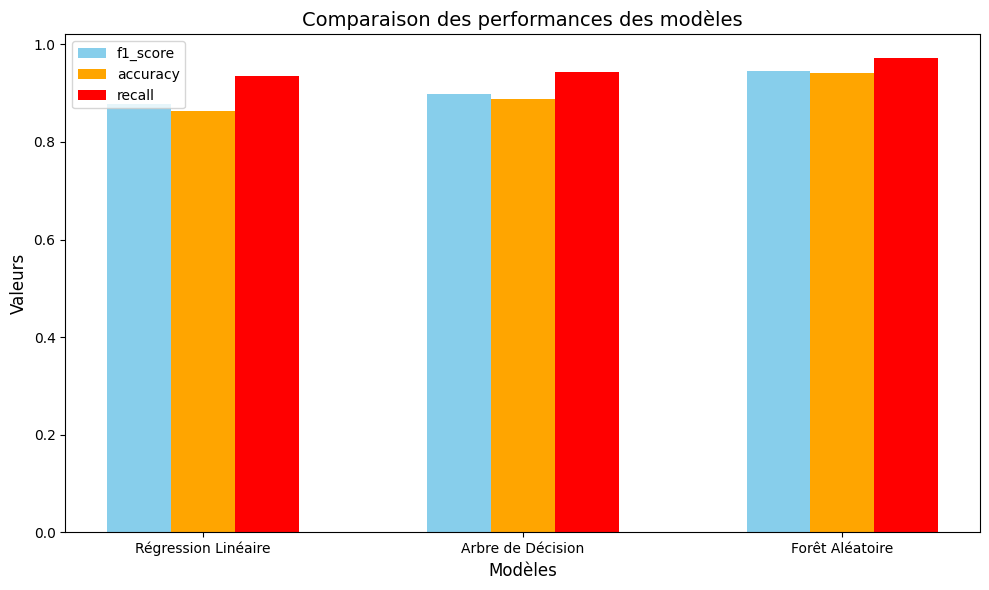

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Préparer les données pour le bar plot
models = results_df2["Modèle"]
f1_values = results_df2["f1_score"]
accuracy_values = results_df2["accuracy"]
recall_values = results_df2["recall"]

x = np.arange(len(models))  # Positions des barres sur l'axe X
width = 0.2  # Largeur des barres

# 2. Créer le bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour F1-Score
bars1 = ax.bar(x - width, f1_values, width, label="f1_score", color="skyblue")

# Barres pour Accuracy
bars2 = ax.bar(x, accuracy_values, width, label="accuracy", color="orange")

# Barres pour Recall
bars3 = ax.bar(x + width, recall_values, width, label="recall", color="red")

# 3. Ajouter des étiquettes et une légende
ax.set_xlabel("Modèles", fontsize=12)
ax.set_ylabel("Valeurs", fontsize=12)
ax.set_title("Comparaison des performances des modèles", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()


# Afficher le graphique
plt.tight_layout()
plt.show()


In [86]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_test2, y_pred2_log)
conf_matrix2 = confusion_matrix(y_test2, y_pred2_tree)
conf_matrix3 = confusion_matrix(y_test2, y_pred2_rf)
print("Matrice de confusion Régression Logistique :")
print(conf_matrix1)
print("Matrice de confusion Arbre de Décision :")
print(conf_matrix2)
print("Matrice de confusion Forêt Aléatoire :")
print(conf_matrix3)

Matrice de confusion Régression Logistique :
[[ 77  21]
 [  7 100]]
Matrice de confusion Arbre de Décision :
[[ 81  17]
 [  6 101]]
Matrice de confusion Forêt Aléatoire :
[[ 89   9]
 [  3 104]]



# **Résultats des matrices de confusion :**

**Comparaison des résultats (Matrice de confusion) :**\
**Régression Logistique :**\
21 faux positifs et 7 faux négatifs, ce qui montre un bon équilibre mais un taux d'erreur plus élevé que les autres modèles.\
**Arbre de Décision :**\
Moins d'erreurs que la régression logistique avec 17 faux positifs et 6 faux négatifs, indiquant une légère amélioration.\
**Forêt Aléatoire :**\
Meilleures performances avec seulement 9 faux positifs et 3 faux négatifs, indiquant un modèle plus robuste et précis.
**Analyse :**
La Forêt Aléatoire réduit significativement les erreurs, suggérant une meilleure capacité à généraliser.
L'Arbre de Décision est légèrement meilleur que la Régression Logistique, mais reste moins performant que la Forêt Aléatoire.
.\
**Conclusion :**
La Forêt Aléatoire est le meilleur modèle, offrant la meilleure précision avec moins d'erreurs.


# Analyse des résultats :

Forêt Aléatoire est le meilleur modèle avec un F1-score de 0.945, une accuracy de 94.1%, et un recall de 97.2%, ce qui signifie qu'il détecte très bien les cas positifs avec peu d'erreurs.\

Arbre de Décision offre des performances correctes (F1-score de 0.897, accuracy de 88.7%, recall de 94.3%), mais légèrement inférieures à la Forêt Aléatoire.\

Régression Linéaire est la moins performante (F1-score de 0.877, accuracy de 86.3%, recall de 93.4%), montrant qu'elle détecte bien les positifs mais fait plus d'erreurs qye les autres .\
**📌 Conclusion :**\
La Forêt Aléatoire est le meilleur modèle, offrant la meilleure précision et détection. L'Arbre de Décision est une bonne alternative, et la Régression Linéaire est la moins efficace ici.
